<a href="https://colab.research.google.com/github/WhiteTeaDragon/SingularValues/blob/main/validating%20the%20article/Clip_just_the_kernel%2C_without_padding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-determinism

  Created wheel for tensorflow-determinism: filename=tensorflow_determinism-0.3.0-cp37-none-any.whl size=9158 sha256=9fb77eba2423fc27d43f79d3e8e5d4462448ad15016d3a27e6872f8eff848331
  Stored in directory: /root/.cache/pip/wheels/66/c3/18/13959a90d3e0d10182a99866d6ff4d0119e9daed6ce014b54c
Successfully built tensorflow-determinism


In [2]:
import pickle
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
import functions

In [ ]:
import importlib
importlib.reload(functions)

<module 'functions' from '/content/functions.py'>

In [4]:
os.environ['TF_DETERMINISTIC_OPS'] = '1'
SEED = 123
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

Время на обучение у разных моделей может отличаться -- это происходит из-за того, что они обучались в разных сессиях Google Colab.

### Loading Data

In [5]:
num_classes = 10

# load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions.
input_shape = x_train.shape[1:]

# normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# if subtract pixel mean is enabled
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


### Without decomposition

#### Model without clipping

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(input_shape)
model.summary()

Learning rate:  0.001
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
________________________________________________________________________

In [ ]:
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'simple_trainHistoryDict', steps_per_epoch=100,
                       batch_size=100, epochs=1000)

Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 1/1000
Learning rate:  0.001
100/100 [==============================] - 41s 83ms/step - loss: 2.7917 - acc: 0.2219 - val_loss: 2.3573 - val_acc: 0.2291

Epoch 00001: val_acc improved from -inf to 0.22910, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/1000
Learning rate:  0.001
100/100 [==============================] - 7s 73ms/step - loss: 1.8881 - acc: 0.3917 - val_loss: 2.0455 - val_acc: 0.3656

Epoch 00002: val_acc improved from 0.22910 to 0.36560, saving model to /content/saved_models/cifar10_ResNet32v1_model.002.h5
Epoch 3/1000
Learning rate:  0.001
100/100 [==============================] - 7s 72ms/step - loss: 1.7052 - acc: 0.4599 - val_loss: 2.1614 - val_acc: 0.3371

Epoch 00003: val_acc did not improve from 0.36560
Epoch 4/1000
Learning rate:  0.001
100/100 [==============================] - 7s 72ms/step - loss: 1.6138 - acc: 0.5131 - val_loss: 1.8819 - val_acc: 0.4220

Ep

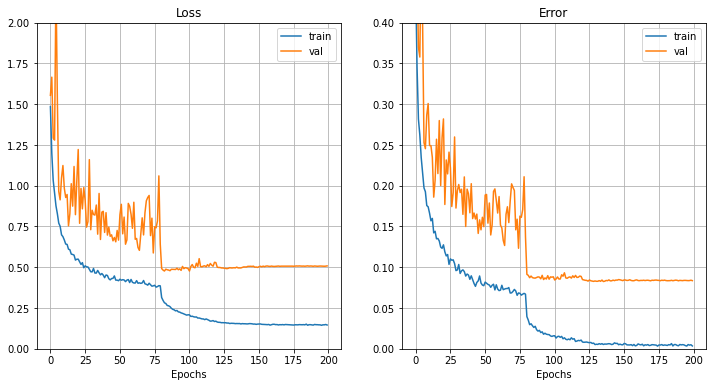

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('simple_trainHistoryDict', "rb"))
functions.plot_loss_acc(history, 2, 0.4)

In [ ]:
history['val_acc'][-1]

0.9164000153541565

In [ ]:
1 - history['val_acc'][-1]

0.0835999846458435

#### Model with clipping to 0.5

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(input_shape)

Learning rate:  0.001


In [ ]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(0.5, "simple")]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'simple_trainHistoryDict_clip_05', steps_per_epoch=100, epochs=1000,
                       batch_size=100,
                       callbacks=callbacks)

Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 1/1000
Learning rate:  0.001
100/100 [==============================] - 11s 80ms/step - loss: 2.4961 - acc: 0.2745 - val_loss: 2.3687 - val_acc: 0.2634

Epoch 00001: val_acc improved from -inf to 0.26340, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/1000
Learning rate:  0.001
100/100 [==============================] - 7s 73ms/step - loss: 2.0267 - acc: 0.2734 - val_loss: 3.5508 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.26340
Epoch 3/1000
Learning rate:  0.001
100/100 [==============================] - 7s 73ms/step - loss: 1.6703 - acc: 0.3801 - val_loss: 4.0442 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.26340
Epoch 4/1000
Learning rate:  0.001
100/100 [==============================] - 7s 73ms/step - loss: 1.4953 - acc: 0.4573 - val_loss: 3.7763 - val_acc: 0.1020

Epoch 00004: val_acc did not improve from 0.26340
Epoch 5/1000
Learning rate:

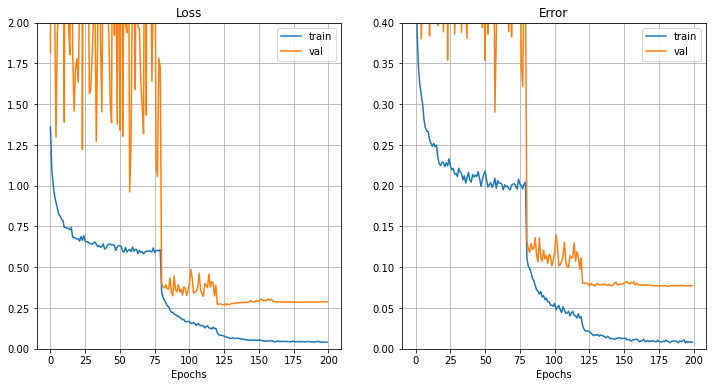

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('simple_trainHistoryDict_clip_05', "rb"))
functions.plot_loss_acc(history, 2, 0.4)

In [ ]:
history['val_acc'][-1]

0.9223999977111816

In [ ]:
1 - history['val_acc'][-1]

0.07760000228881836

#### Model with clipping to 1

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(input_shape)

Learning rate:  0.001


In [ ]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(1, "simple")]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'simple_trainHistoryDict_clip_1', steps_per_epoch=100, epochs=1000,
                       batch_size=100,
                       callbacks=callbacks)

Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 1/1000
Learning rate:  0.001
100/100 [==============================] - 12s 84ms/step - loss: 3.4927 - acc: 0.2104 - val_loss: 3.0568 - val_acc: 0.1511

Epoch 00001: val_acc improved from -inf to 0.15110, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/1000
Learning rate:  0.001
100/100 [==============================] - 7s 75ms/step - loss: 1.8758 - acc: 0.3446 - val_loss: 3.4404 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.15110
Epoch 3/1000
Learning rate:  0.001
100/100 [==============================] - 7s 74ms/step - loss: 1.6200 - acc: 0.4300 - val_loss: 4.0561 - val_acc: 0.1126

Epoch 00003: val_acc did not improve from 0.15110
Epoch 4/1000
Learning rate:  0.001
100/100 [==============================] - 8s 76ms/step - loss: 1.5210 - acc: 0.4705 - val_loss: 2.6097 - val_acc: 0.1881

Epoch 00004: val_acc improved from 0.15110 to 0.18810, saving model to /conte

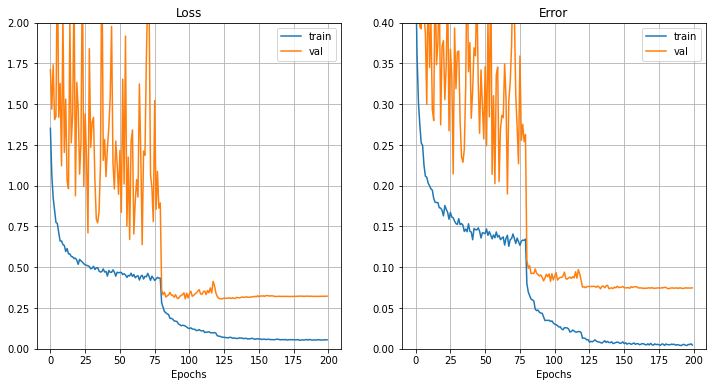

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('simple_trainHistoryDict_clip_1', "rb"))
functions.plot_loss_acc(history, 2, 0.4)

In [ ]:
history['val_acc'][-1]

0.9253000020980835

In [ ]:
1 - history['val_acc'][-1]

0.0746999979019165

#### Model with modified clipping to 0.5

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(input_shape)

Learning rate:  0.001


In [ ]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(0.5, "trying")]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trying_trainHistoryDict_clip_05', steps_per_epoch=100, epochs=1000,
                       batch_size=100,
                       callbacks=callbacks)

Выходные данные были обрезаны до нескольких последних строк (5000).
Learning rate:  0.001
100/100 [==============================] - 26s 204ms/step - loss: 2.9372 - acc: 0.2282 - val_loss: 2.2165 - val_acc: 0.2749

Epoch 00001: val_acc improved from -inf to 0.27490, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/1000
Learning rate:  0.001
100/100 [==============================] - 19s 193ms/step - loss: 1.9781 - acc: 0.2704 - val_loss: 3.4221 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.27490
Epoch 3/1000
Learning rate:  0.001
100/100 [==============================] - 19s 194ms/step - loss: 1.7437 - acc: 0.3531 - val_loss: 3.8289 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.27490
Epoch 4/1000
Learning rate:  0.001
100/100 [==============================] - 19s 194ms/step - loss: 1.5860 - acc: 0.4311 - val_loss: 3.8588 - val_acc: 0.1059

Epoch 00004: val_acc did not improve from 0.27490
Epoch 5/1000
Learning rate:  0.00

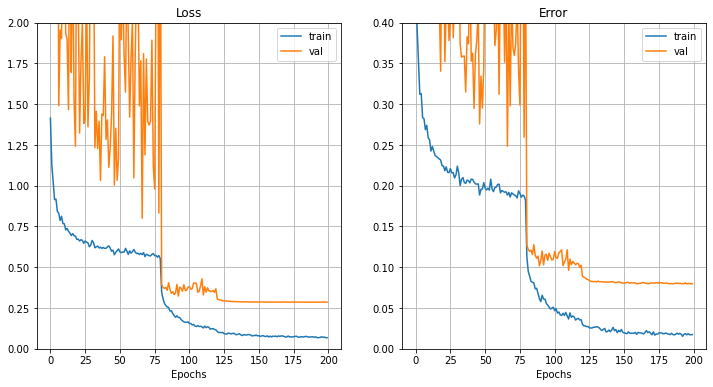

In [6]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trying_trainHistoryDict_clip_05', "rb"))
functions.plot_loss_acc(history, 2, 0.4)

In [7]:
history['val_acc'][-1]

0.9200000166893005

In [8]:
1 - history['val_acc'][-1]

0.07999998331069946

#### Model with modified clipping to 1

In [9]:
model, model_type = functions.define_and_compile_ResNet_model(input_shape)

Learning rate:  0.001


In [10]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(1, "trying")]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trying_trainHistoryDict_clip_1', steps_per_epoch=100, epochs=650,
                       batch_size=100,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/650
Learning rate:  0.001
100/100 [==============================] - 45s 115ms/step - loss: 2.6999 - acc: 0.2526 - val_loss: 2.5398 - val_acc: 0.2269

Epoch 00001: val_acc improved from -inf to 0.22690, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/650
Learning rate:  0.001
100/100 [==============================] - 10s 103ms/step - loss: 1.8676 - acc: 0.3379 - val_loss: 4.3840 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.22690
Epoch 3/650
Learning rate:  0.001
100/100 [==============================] - 10s 103ms/step - loss: 1.5738 - acc: 0.4640 - val_loss: 4.6673 - val_acc: 0.1122

Epoch 00003: val_acc did not improve from 0.22690
Epoch 4/650
Learning rate:  0.001
100/100 [==============================] - 10s 103ms/step - loss: 1.4469 - acc: 0.5055 - val_loss: 1.9222 - val_acc: 0.3649

Epoch 00004: val_acc improved from 0.22690 to 0.36490, saving model to /content/saved_models/cifar10_ResNet

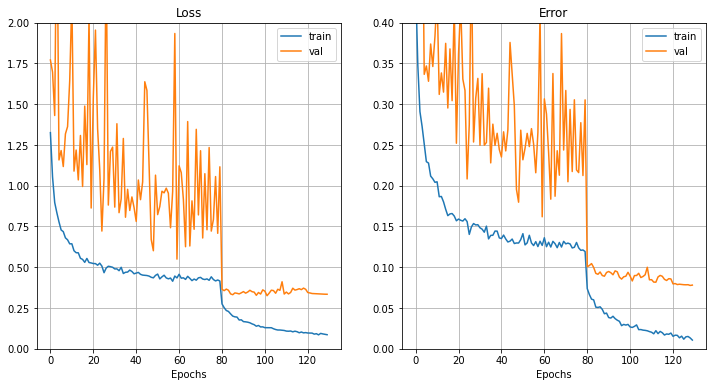

In [11]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trying_trainHistoryDict_clip_1', "rb"))
functions.plot_loss_acc(history, 2, 0.4)

In [12]:
history['val_acc'][-1]

0.9218999743461609

In [13]:
1 - history['val_acc'][-1]

0.07810002565383911

#### Plotting final graph

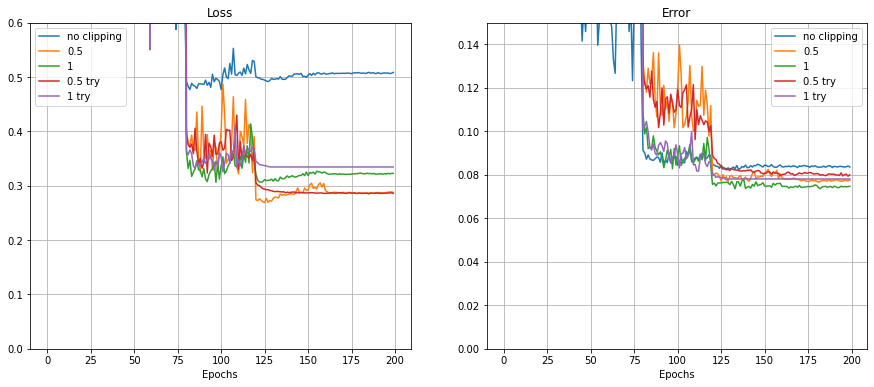

In [22]:
history_no_clipping = pickle.load(open('simple_trainHistoryDict', "rb"))
history_05 = pickle.load(open('simple_trainHistoryDict_clip_05', "rb"))
history_1 = pickle.load(open('simple_trainHistoryDict_clip_1', "rb"))
history_05_trying = pickle.load(open('trying_trainHistoryDict_clip_05', "rb"))
history_1_trying = pickle.load(open('trying_trainHistoryDict_clip_1', "rb"))
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].grid(True)
axs[1].grid(True)
max_len = len(history_no_clipping['val_loss'])
axs[0].plot(history_no_clipping['val_loss'][4:max_len:5], label='no clipping')
axs[0].plot(history_05['val_loss'][4:max_len:5], label='0.5')
axs[0].plot(history_1['val_loss'][4:max_len:5], label='1')
axs[0].plot(history_05_trying['val_loss'][4:max_len:5], label='0.5 try')
axs[0].plot(history_1_trying['val_loss'][4:max_len:5] + [history_1_trying['val_loss'][-1]] * 70 , label='1 try')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylim(0, 0.6)
axs[1].plot(1 - np.array(history_no_clipping['val_acc'][4:max_len:5]), label='no clipping')
axs[1].plot(1 - np.array(history_05['val_acc'][4:max_len:5]), label='0.5')
axs[1].plot(1 - np.array(history_1['val_acc'][4:max_len:5]), label='1')
axs[1].plot(1 - np.array(history_05_trying['val_acc'][4:max_len:5]), label='0.5 try')
axs[1].plot(1 - np.array(history_1_trying['val_acc'][4:max_len:5] + [history_1_trying['val_acc'][-1]] * 70), label='1 try')
axs[1].set_title('Error')
axs[1].set_xlabel('Epochs')
axs[1].set_ylim(0, 0.15)
axs[0].legend(loc='best')
axs[1].legend(loc='best')